In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math

In [2]:
# function for balistic deposition with relaxation
def selection(x,y,z,k):
    if x==y and x==z:
        return k
    elif x==z and x<y:
        v=np.random.randint(2) #for same values, should choose randomely
        if v==0:
            return k+1
        else:
            return k-1
    else:
        a=[x,y,z]
        b=min(a)
        c=a.index(b)
        if c==0:
            return k-1
        elif c==1:
            return k
        else:
            return k+1

In [3]:
# balistic deposition with relaxation
start=timeit.default_timer()
l=200      #lattice size
t=50000    #number of particles
h=list(np.zeros(l))
y_new=[]   #for height
x_new=[]
for i in range(t):
    k=np.random.randint(l)
    if k==0:
        key=selection(h[l-1],h[0],h[1],k)%l
        h[key]=h[key]+1
        x_new.append(key)
        y_new.append(h[key])
    elif k==l-1:
        key=selection(h[l-2],h[l-1],h[0],k)%l
        h[key]=h[key]+1
        x_new.append(key)
        y_new.append(h[key])
    else:    
        key=selection(h[k-1],h[k],h[k+1],k)%l
        h[key]=h[key]+1
        x_new.append(key)
        y_new.append(h[key])
stop=timeit.default_timer()
print('creation time :',stop-start)    

creation time : 0.21682099999998172


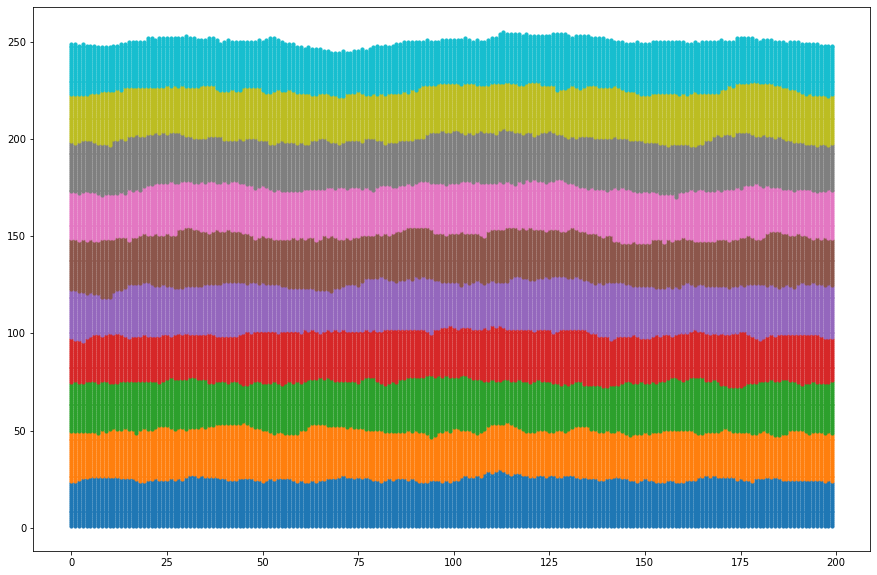

In [4]:
#balistic deposition with relaxation show
fig = plt.figure(figsize=(15,10))
colour=10   #number of colors
n=int(t/colour)
for i in range(colour):
    plt.scatter(x_new[i*n:(i+1)*n],y_new[i*n:(i+1)*n],s=10)

In [34]:
#variance and height calculating for 5 runs and 10 million particles
start=timeit.default_timer()
l=200
t=10000000
run=5
h=list(np.zeros((run,l)))
tt=[]
variance=[]
h_prime=[]
factor=10**(1/6)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt.append(var_count)
                print(len(tt)) #shows number of time intervals in which we calculate variance and mean height
            variance.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)     

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
variance calculation time : 246.8803173999986


<ErrorbarContainer object of 3 artists>

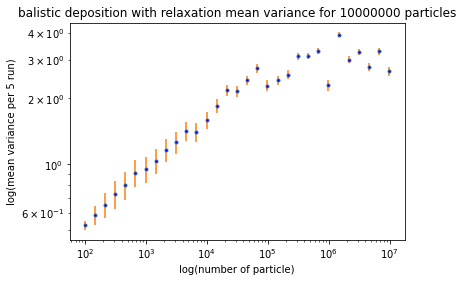

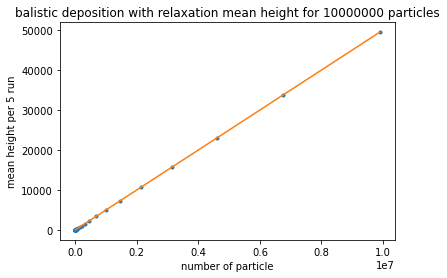

In [56]:
#mean variance and mean height ploting
variance_prime=np.zeros(len(tt)) #for mean variance
variance_prime2=np.zeros(len(tt)) #for mean of variance squared
w=np.zeros(len(tt)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt))
for j in range(len(tt)):
    for i in range(run):
        variance_prime[j]=variance[int(len(tt)*i+j)]+variance_prime[j]
        variance_prime2[j]=variance[int(len(tt)*i+j)]**2+variance_prime[j]**2
        h_mean[j]=h_prime[int(len(tt)*i+j)]+h_mean[j]
        
variance_prime=variance_prime/run
variance_prime2=variance_prime2/run
w=variance_prime**2
h_mean=h_mean/run
for k in range(len(tt)):
    yerr.append(np.sqrt(variance_prime2[k]-w[k]))
    
for k in range(len(tt)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 10000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt,variance_prime,'.')
ax.errorbar(tt,variance_prime,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)

fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean height for 10000000 particles')
ax.set_ylabel('mean height per 5 run')
ax.set_xlabel('number of particle')
plt.plot(tt,h_mean,'.')
plt.errorbar(tt,h_mean)

In [47]:
#fit line
x=np.log(tt)
y=np.log(variance_prime)
point_s=len(tt)-1
for i in range(len(tt)):
    z=np.polyfit(x[i:len(tt)],y[i:len(tt)],1)
    if -0.05<z[0]<0.05:
        point_s=i
        break
t_x=tt[point_s+1]
w_x=variance_prime[point_s+1]

In [48]:
print('saturation point is',t_x)

saturation point is 67385


In [49]:
print('saturation variance',w_x)

saturation variance 2.739779393661181


In [41]:
#different time intervals
tt

[100,
 146,
 214,
 314,
 460,
 675,
 990,
 1453,
 2132,
 3129,
 4592,
 6740,
 9892,
 14519,
 21310,
 31278,
 45909,
 67385,
 98907,
 145175,
 213087,
 312768,
 459080,
 673837,
 989057,
 1451737,
 2130858,
 3127671,
 4590793,
 6738362,
 9890562]

In [57]:
#mean height of 5 runs for different time intervals
h_mean

array([5.0500000e-01, 7.3500000e-01, 1.0750000e+00, 1.5750000e+00,
       2.3050000e+00, 3.3800000e+00, 4.9550000e+00, 7.2700000e+00,
       1.0665000e+01, 1.5650000e+01, 2.2965000e+01, 3.3705000e+01,
       4.9465000e+01, 7.2600000e+01, 1.0655500e+02, 1.5639500e+02,
       2.2955000e+02, 3.3693000e+02, 4.9454000e+02, 7.2588000e+02,
       1.0654400e+03, 1.5638450e+03, 2.2954050e+03, 3.3691900e+03,
       4.9452900e+03, 7.2586900e+03, 1.0654295e+04, 1.5638360e+04,
       2.2953970e+04, 3.3691815e+04, 4.9452815e+04])

In [42]:
#mean variance of 5 runs for different time intervals
variance_prime

array([0.5252768 , 0.58489865, 0.65165147, 0.72942703, 0.80526178,
       0.91300183, 0.94957426, 1.0364895 , 1.16356564, 1.25783472,
       1.4222488 , 1.3986316 , 1.59331205, 1.85036251, 2.18300678,
       2.15180351, 2.41664812, 2.73977939, 2.28442928, 2.41630074,
       2.56852768, 3.12113119, 3.12389253, 3.30161612, 2.29310002,
       3.90402061, 3.00386437, 3.25504013, 2.77748342, 3.28196785,
       2.65650691])

Beta is 0.2448902598227248


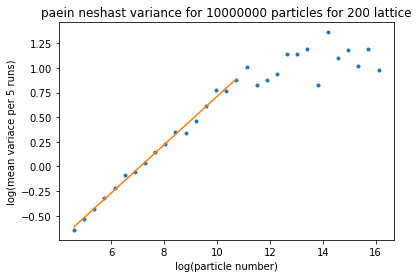

In [53]:
#beta calculation and show
z=np.polyfit(x[0:point_s],y[0:point_s],1)
print('Beta is',z[0])
fig,ax=plt.subplots()
ax.set_title('paein neshast variance for 10000000 particles for 200 lattice')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
plt.plot([x[0],x[point_s]],[x[0]*z[0]+z[1],x[point_s]*z[0]+z[1]])

In [8]:
start=timeit.default_timer()
l=100
t=8000000
run=5
h=list(np.zeros((run,l)))
tt1=[]
variance1=[]
h_prime=[]
factor=10**(1/6)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt1.append(var_count)
                print(len(tt1)) #shows number of time intervals in which we calculate variance and mean height
            variance1.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start)     

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 205.56195869999647


<ErrorbarContainer object of 3 artists>

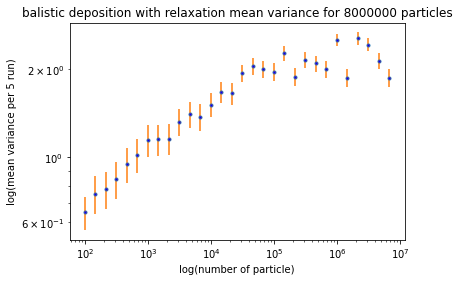

In [9]:
#mean variance and mean height ploting
variance_prime1=np.zeros(len(tt1)) #for mean variance
variance_prime21=np.zeros(len(tt1)) #for mean of variance squared
w=np.zeros(len(tt1)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt1))
for j in range(len(tt1)):
    for i in range(run):
        variance_prime1[j]=variance1[int(len(tt1)*i+j)]+variance_prime1[j]
        variance_prime21[j]=variance1[int(len(tt1)*i+j)]**2+variance_prime1[j]**2
        h_mean[j]=h_prime[int(len(tt1)*i+j)]+h_mean[j]
        
variance_prime1=variance_prime1/run
variance_prime21=variance_prime21/run
w=variance_prime1**2
h_mean=h_mean/run
for k in range(len(tt1)):
    yerr.append(np.sqrt(variance_prime21[k]-w[k]))
    
for k in range(len(tt1)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime1[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 8000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt1,variance_prime1,'.')
ax.errorbar(tt1,variance_prime1,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)


In [14]:
#fit line
x1=np.log(tt1)
y1=np.log(variance_prime1)
point_s1=len(tt1)-1
for i in range(len(tt1)):
    z1=np.polyfit(x1[i:len(tt1)],y1[i:len(tt1)],1)
    if -0.05<z1[0]<0.05:
        point_s1=i
        break
t_x1=tt1[point_s1+4]
w_x1=variance_prime1[point_s1+4]

In [15]:
print('saturation point is',t_x1)

saturation point is 45909


In [16]:
print('saturation variance',w_x1)

saturation variance 2.0462273062066263


In [13]:
tt1

[100,
 146,
 214,
 314,
 460,
 675,
 990,
 1453,
 2132,
 3129,
 4592,
 6740,
 9892,
 14519,
 21310,
 31278,
 45909,
 67385,
 98907,
 145175,
 213087,
 312768,
 459080,
 673837,
 989057,
 1451737,
 2130858,
 3127671,
 4590793,
 6738362]

In [18]:
start=timeit.default_timer()
l=200
t=8000000
run=5
h=list(np.zeros((run,l)))
tt1=[]
variance2=[]
h_prime=[]
factor=10**(1/6)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt1.append(var_count)
                print(len(tt1)) #shows number of time intervals in which we calculate variance and mean height
            variance2.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 200.24217009999848


<ErrorbarContainer object of 3 artists>

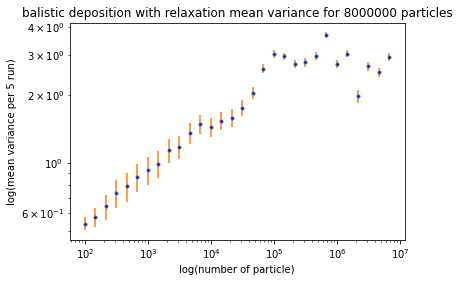

In [26]:
#mean variance and mean height ploting
variance_prime2=np.zeros(len(tt1)) #for mean variance
variance_prime22=np.zeros(len(tt1)) #for mean of variance squared
w=np.zeros(len(tt1)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt1))
for j in range(len(tt1)):
    for i in range(run):
        variance_prime2[j]=variance2[int(len(tt1)*i+j)]+variance_prime2[j]
        variance_prime22[j]=variance2[int(len(tt1)*i+j)]**2+variance_prime2[j]**2
        h_mean[j]=h_prime[int(len(tt1)*i+j)]+h_mean[j]
        
variance_prime2=variance_prime2/run
variance_prime22=variance_prime22/run
w=variance_prime2**2
h_mean=h_mean/run
for k in range(len(tt1)):
    yerr.append(np.sqrt(variance_prime22[k]-w[k]))
    
for k in range(len(tt1)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime2[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 8000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt1,variance_prime2,'.')
ax.errorbar(tt1,variance_prime2,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)

In [34]:
#fit line
x2=np.log(tt1)
y2=np.log(variance_prime2)
point_s2=len(tt1)-1
for i in range(len(tt1)):
    z2=np.polyfit(x2[i:len(tt1)],y2[i:len(tt1)],1)
    if -0.05<z2[0]<0.05:
        point_s2=i
        break
t_x2=tt1[point_s2+3]
w_x2=variance_prime2[point_s2+3]

In [35]:
print('saturation point is',t_x2)

saturation point is 98907


In [36]:
print('saturation variance',w_x2)

saturation variance 3.024306300546242


In [25]:
start=timeit.default_timer()
l=300
t=8000000
run=5
h=list(np.zeros((run,l)))
tt1=[]
variance3=[]
h_prime=[]
factor=10**(1/6)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt1.append(var_count)
                print(len(tt1)) #shows number of time intervals in which we calculate variance and mean height
            variance3.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
variance calculation time : 197.82664010000008


<ErrorbarContainer object of 3 artists>

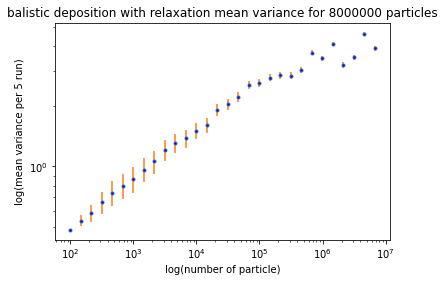

In [27]:
#mean variance and mean height ploting
variance_prime3=np.zeros(len(tt1)) #for mean variance
variance_prime23=np.zeros(len(tt1)) #for mean of variance squared
w=np.zeros(len(tt1)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt1))
for j in range(len(tt1)):
    for i in range(run):
        variance_prime3[j]=variance3[int(len(tt1)*i+j)]+variance_prime3[j]
        variance_prime23[j]=variance3[int(len(tt1)*i+j)]**2+variance_prime3[j]**2
        h_mean[j]=h_prime[int(len(tt1)*i+j)]+h_mean[j]
        
variance_prime3=variance_prime3/run
variance_prime23=variance_prime23/run
w=variance_prime3**2
h_mean=h_mean/run
for k in range(len(tt1)):
    yerr.append(np.sqrt(variance_prime23[k]-w[k]))
    
for k in range(len(tt1)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime3[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 8000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt1,variance_prime3,'.')
ax.errorbar(tt1,variance_prime3,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)

In [45]:
#fit line
x3=np.log(tt1)
y3=np.log(variance_prime3)
point_s3=len(tt1)-1
for i in range(len(tt1)):
    z3=np.polyfit(x3[i:len(tt1)],y3[i:len(tt1)],1)
    if -0.1<z3[0]<0.1:
        point_s3=i
        break
t_x3=tt1[point_s3+1]
w_x3=variance_prime3[point_s3+1]

In [46]:
print('saturation point is',t_x3)

saturation point is 673837


In [47]:
print('saturation variance',w_x3)

saturation variance 3.7194204529799606


In [54]:
start=timeit.default_timer()
l=400
t=15000000
run=5
h=list(np.zeros((run,l)))
tt4=[]
variance4=[]
h_prime=[]
factor=10**(1/8)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt4.append(var_count)
                print(len(tt4)) #shows number of time intervals in which we calculate variance and mean height
            variance4.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
variance calculation time : 378.3446516999975


<ErrorbarContainer object of 3 artists>

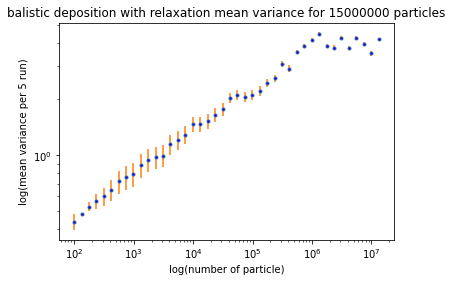

In [55]:
#mean variance and mean height ploting
variance_prime4=np.zeros(len(tt4)) #for mean variance
variance_prime24=np.zeros(len(tt4)) #for mean of variance squared
w=np.zeros(len(tt4)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt4))
for j in range(len(tt4)):
    for i in range(run):
        variance_prime4[j]=variance4[int(len(tt4)*i+j)]+variance_prime4[j]
        variance_prime24[j]=variance4[int(len(tt4)*i+j)]**2+variance_prime4[j]**2
        h_mean[j]=h_prime[int(len(tt4)*i+j)]+h_mean[j]
        
variance_prime4=variance_prime4/run
variance_prime24=variance_prime24/run
w=variance_prime4**2
h_mean=h_mean/run
for k in range(len(tt4)):
    yerr.append(np.sqrt(variance_prime24[k]-w[k]))
    
for k in range(len(tt4)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime4[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 15000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt4,variance_prime4,'.')
ax.errorbar(tt4,variance_prime4,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)

In [61]:
#fit line
x4=np.log(tt4)
y4=np.log(variance_prime4)
point_s4=len(tt4)-1
for i in range(len(tt4)):
    z4=np.polyfit(x4[i:len(tt4)],y4[i:len(tt4)],1)
    if -0.01<z4[0]<0.01:
        point_s4=i
        break
t_x4=tt4[point_s4+2]
w_x4=variance_prime4[point_s4+2]

In [62]:
print('saturation point is',t_x4)

saturation point is 987040


In [79]:
print('saturation variance',w_x4)

saturation variance 4.138802402829353


In [60]:
tt4

[100,
 133,
 177,
 236,
 314,
 418,
 557,
 742,
 989,
 1318,
 1757,
 2342,
 3123,
 4164,
 5552,
 7403,
 9872,
 13164,
 17554,
 23408,
 31215,
 41625,
 55507,
 74019,
 98705,
 131625,
 175524,
 234065,
 312130,
 416232,
 555054,
 740176,
 987040,
 1316238,
 1755231,
 2340638,
 3121290,
 4162307,
 5550525,
 7401744,
 9870384,
 13162368]

In [64]:
start=timeit.default_timer()
l=500
t=15000000
run=5
h=list(np.zeros((run,l)))
tt4=[]
variance5=[]
h_prime=[]
factor=10**(1/8)
for j in range(run):
    var_count=100
    for i in range(t):
        k=np.random.randint(l)
        if k==0:
            key=selection(h[j][l-1],h[j][0],h[j][1],k)%l
            h[j][key]=h[j][key]+1
        elif k==l-1:
            key=selection(h[j][l-2],h[j][l-1],h[j][0],k)%l
            h[j][key]=h[j][key]+1
        else:    
            key=selection(h[j][k-1],h[j][k],h[j][k+1],k)%l
            h[j][key]=h[j][key]+1
        if i == var_count:
            if j==0:
                tt4.append(var_count)
                print(len(tt4)) #shows number of time intervals in which we calculate variance and mean height
            variance5.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor)
stop=timeit.default_timer()
print('variance calculation time :',stop-start) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
variance calculation time : 389.0347438000026


<ErrorbarContainer object of 3 artists>

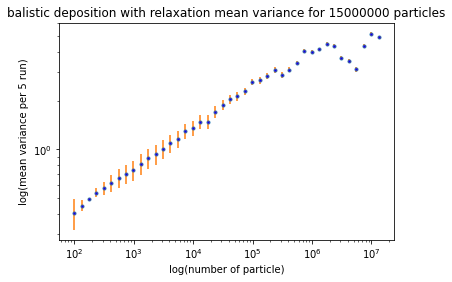

In [65]:
#mean variance and mean height ploting
variance_prime5=np.zeros(len(tt4)) #for mean variance
variance_prime25=np.zeros(len(tt4)) #for mean of variance squared
w=np.zeros(len(tt4)) #for squar of mean variance
yerr =[] #shows error
h_mean=np.zeros(len(tt4))
for j in range(len(tt4)):
    for i in range(run):
        variance_prime5[j]=variance5[int(len(tt4)*i+j)]+variance_prime5[j]
        variance_prime25[j]=variance5[int(len(tt4)*i+j)]**2+variance_prime5[j]**2
        h_mean[j]=h_prime[int(len(tt4)*i+j)]+h_mean[j]
        
variance_prime5=variance_prime5/run
variance_prime25=variance_prime25/run
w=variance_prime5**2
h_mean=h_mean/run
for k in range(len(tt4)):
    yerr.append(np.sqrt(variance_prime25[k]-w[k]))
    
for k in range(len(tt4)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime5[k]* math.log(10))
    
fig,ax=plt.subplots()
ax.set_title('balistic deposition with relaxation mean variance for 15000000 particles')
ax.set_ylabel('log(mean variance per 5 run)')
ax.set_xlabel('log(number of particle)')
plt.loglog(tt4,variance_prime5,'.')
ax.errorbar(tt4,variance_prime5,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)

In [77]:
#fit line
x5=np.log(tt4)
y5=np.log(variance_prime5)
point_s5=len(tt4)-1
for i in range(len(tt4)):
    z5=np.polyfit(x5[i:len(tt4)],y5[i:len(tt4)],1)
    if -0.1<z5[0]<0.1:
        point_s5=i
        break
t_x5=tt4[point_s5]
w_x5=variance_prime5[point_s5]

In [78]:
print('saturation point is',t_x5)

saturation point is 234065


In [80]:
print('saturation variance',w_x5)

saturation variance 3.0931023500370562


In [81]:
ws =[w_x1,w_x2,w_x3,w_x4,w_x5]
L =[100,200,300,400,500]
ts =[t_x1,t_x2,t_x3,t_x3,t_x5]

Alpha is 0.34197798618413555


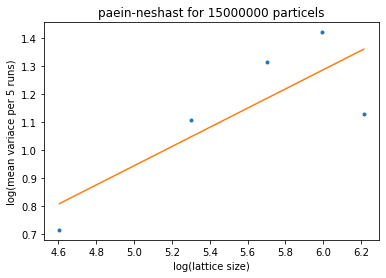

In [86]:
x=np.log(L)
y=np.log(ws)
z=np.polyfit(x,y,1)
print('Alpha is',z[0])
fig,ax=plt.subplots()
ax.set_title('paein-neshast for 15000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(lattice size)')
plt.plot(x,y,'.')
a=[x[0],x[len(L)-1]]
b=[x[0]*z[0]+z[1],x[len(L)-1]*z[0]+z[1]]
plt.plot(a,b)

Beta is 0.21385846053965796


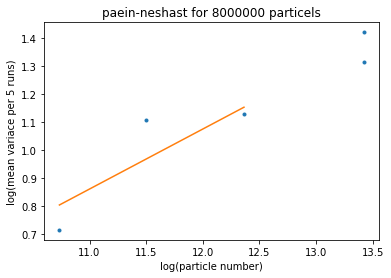

In [87]:
x=np.log(ts)
y=np.log(ws)
z=np.polyfit(x,y,1)
print('Beta is',z[0])
fig,ax=plt.subplots()
ax.set_title('paein-neshast for 8000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
a=[x[0],x[len(ws)-1]]
b=[x[0]*z[0]+z[1],x[len(ws)-1]*z[0]+z[1]]
plt.plot(a,b)

Z is 0.4265326915404403


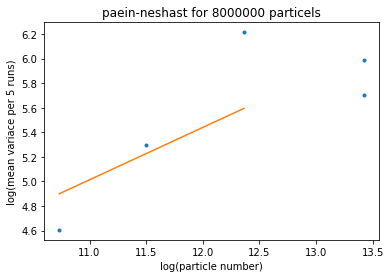

In [88]:
x=np.log(ts)
y=np.log(L)
z=np.polyfit(x,y,1)
print('Z is',z[0])
fig,ax=plt.subplots()
ax.set_title('paein-neshast for 8000000 particels')
ax.set_ylabel('log(mean variace per 5 runs)')
ax.set_xlabel('log(particle number)')
plt.plot(x,y,'.')
a=[x[0],x[len(L)-1]]
b=[x[0]*z[0]+z[1],x[len(L)-1]*z[0]+z[1]]
plt.plot(a,b)

In [11]:
#different lattices, 5 run for 10 million particles
start=timeit.default_timer()
t=10000000
L=[100,150,200,250]
run=5
h=np.zeros(((int(len(L)),run,L[len(L)-1])))
tt=[]
variance=[]
factor=10**(1/6)
for item in L:
    l=item
    c=L.index(item)
    for j in range(run):
        var_count=100
        for i in range(t):
            k=np.random.randint(l)
            if k==0:
                key=selection(h[c][j][l-1],h[c][j][0],h[c][j][1],k)%l
                h[c][j][key]=h[c][j][key]+1
            elif k==l-1:
                key=selection(h[c][j][l-2],h[c][j][l-1],h[c][j][0],k)%l
                h[c][j][key]=h[c][j][key]+1
            else:    
                key=selection(h[c][j][k-1],h[c][j][k],h[c][j][k+1],k)%l
                h[c][j][key]=h[c][j][key]+1
            if i == var_count:
                if j==0 and c==0:
                    tt.append(var_count)
                    print(len(tt))
                variance.append(np.sqrt(np.var(h[c][j][0:L[c]])))
                var_count=int(var_count*factor)
stop=timeit.default_timer()
print('calculation time :',stop-start)                

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
calculation time : 3401.6145774000033


In [21]:
#preparing for alpha
t_s=[]
w_s=[]
for j in range(len(L)):
    point_s=len(tt)-1
    x=np.log(tt)
    y=np.log(variance_prime[j][:])
    for i in range(len(tt)):
        z=np.polyfit(x[i:len(tt)],y[i:len(tt)],1)
        if -0.04<z[0]<0.04:
            point_s=i
            break
    t_s.append(tt[point_s])
    w_s.append(variance_prime[j][point_s])

In [22]:
# alpha calculation 
x=np.log(np.array(L))
y=np.log(w_s)
z=np.polyfit(x,y,1)
print('alpha is:',z[0])

alpha is: 0.5053242854635241


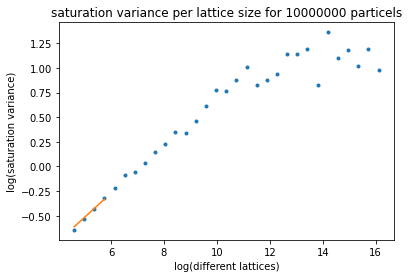

In [55]:
# alpha show
fig,ax=plt.subplots()
ax.set_title('saturation variance per lattice size for 10000000 particels')
ax.set_ylabel('log(saturation variance)')
ax.set_xlabel('log(different lattices)')
plt.plot(x,y,'.')
a=[x[0],x[len(L)-1]]
b=[x[0]*z[0]+z[1],x[len(L)-1]*z[0]+z[1]]
plt.plot(a,b)